<a href="https://colab.research.google.com/github/casalazara/Data-Science-Aplicado/blob/master/Lab2/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadstat
!pip install pandas-profiling==2.7.1

In [2]:
# Importante librerias o modulos que se van a usar en esta sesion
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling 

##Librerías para graficar
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lectura de los datos

In [3]:
condiVida = pd.read_spss('B.sav')
fuerTrabajo = pd.read_spss('H.sav')

In [4]:
condiVida.head()

DIRECTORIO       FEX_C  ... P4030S2                        P4020
0   2915591.0  463.993402  ...      Sí            Cemento, gravilla
1   2915592.0   93.084381  ...      No  Baldosa, cerámica, laminado
2   2915593.0  516.279638  ...      Sí  Baldosa, cerámica, laminado
3   2915594.0  655.671443  ...      Sí            Cemento, gravilla
4   2915595.0  326.783507  ...      Sí  Baldosa, cerámica, laminado

[5 rows x 14 columns]

In [5]:
fuerTrabajo.head()

DIRECTORIO  SECUENCIA_P  ORDEN        P1152  ... P6330 P6340 P6350 P6351
0   2915591.0          1.0    1.0  Trabajando.  ...   NaN   NaN   NaN   NaN
1   2915592.0          1.0    1.0  Trabajando.  ...   NaN   NaN   NaN   NaN
2   2915593.0          1.0    1.0  Trabajando.  ...   NaN   NaN   NaN   NaN
3   2915593.0          1.0    2.0  Estudiando.  ...   NaN   NaN   NaN   NaN
4   2915594.0          1.0    1.0  Trabajando.  ...   NaN   NaN   NaN   NaN

[5 rows x 16 columns]

# B. CONDICIONES DE LA VIVIENDA

## Análisis del tipo de variables

In [6]:
condiVida.dtypes

DIRECTORIO           float64
FEX_C                float64
REGION              category
DIA_REFERENCIA_2    category
clase               category
P424                category
P4030S1             category
P4030S1A1            float64
P4030S5             category
P4030S3             category
P4030S4             category
P4030S4A1            float64
P4030S2             category
P4020               category
dtype: object

De acuerdo a la descripción de variables en la página, las columnas P4030S1A1 y P4030S4A1 son las únicas variables numéricas discretas, las demás son continuas. Sin embargo, estas columnas cuentan con valores no numéricos que se deben reemplazar por lo que antes de cambiar el tipo hay que decidir qué hacer con ellos.

In [7]:
def cambiara_int(condiVida):
    condiVida["P4030S1A1"]=condiVida["P4030S1A1"].astype(int)
    condiVida["P4030S4A1"]=condiVida["P4030S4A1"].astype(int)

## Datos duplicados

In [8]:
duplicados = condiVida.duplicated().sum()
print(duplicados)
condiVida[condiVida.duplicated()]

0


Empty DataFrame
Columns: [DIRECTORIO, FEX_C, REGION, DIA_REFERENCIA_2, clase, P424, P4030S1, P4030S1A1, P4030S5, P4030S3, P4030S4, P4030S4A1, P4030S2, P4020]
Index: []

## Datos faltantes

In [9]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [10]:
missing_values_table(condiVida)

Missing Values  % of Total Values
DIRECTORIO                     0           0.000000
FEX_C                          0           0.000000
REGION                         0           0.000000
DIA_REFERENCIA_2               0           0.000000
clase                          0           0.000000
P424                           0           0.000000
P4030S1                        0           0.000000
P4030S1A1                    872           2.062197
P4030S5                        0           0.000000
P4030S3                        0           0.000000
P4030S4                        0           0.000000
P4030S4A1                   7267          17.185763
P4030S2                        0           0.000000
P4020                          0           0.000000

La mayoría de columnas no tienen valores nulos. Sin embargo, las columnas P4030S1A1 y P4030S4A1 cuentan con valores nulos, la columna P4030S4A1 corresponde de acuerdo al diccionario a el número de días por semana que se realiza la recolección de basuras

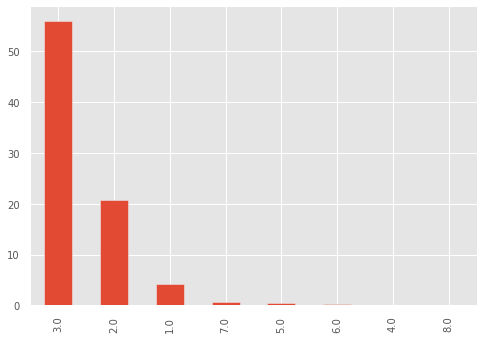

In [11]:
(condiVida['P4030S4A1'].value_counts()*100/len(condiVida)).plot(kind='bar')


Mientras que la columna P4030S1A1 corresponde al estrato para la tarifa de la energía eléctrica

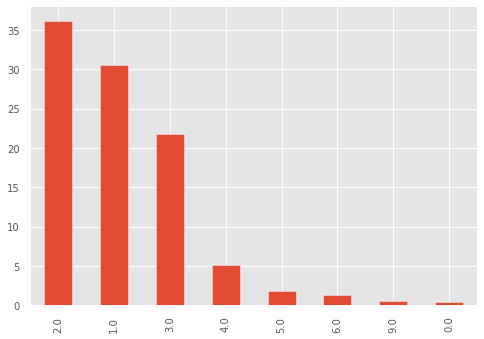

In [12]:
(condiVida['P4030S1A1'].value_counts()*100/len(condiVida)).plot(kind='bar')

Para la columna P4030S1A1 dada la baja cantidad de filas con este valor nulo y la importancia del estrato socioeconómico para los análisis lo mejor es eliminar estas filas, para la columna P4030S4A1 dada la distribución de valores lo mejor sería reemplazar los valores faltantes con la moda (3.0)

In [13]:
condiVida.dropna(axis=0, subset=['P4030S1A1'],inplace=True)
condiVida['P4030S4A1'] = condiVida['P4030S4A1'].fillna(condiVida['P4030S4A1'].mode()[0])
missing_values_table(condiVida)

Missing Values  % of Total Values
DIRECTORIO                     0                0.0
FEX_C                          0                0.0
REGION                         0                0.0
DIA_REFERENCIA_2               0                0.0
clase                          0                0.0
P424                           0                0.0
P4030S1                        0                0.0
P4030S1A1                      0                0.0
P4030S5                        0                0.0
P4030S3                        0                0.0
P4030S4                        0                0.0
P4030S4A1                      0                0.0
P4030S2                        0                0.0
P4020                          0                0.0

In [14]:
cambiara_int(condiVida)
condiVida.head()

DIRECTORIO       FEX_C  ... P4030S2                        P4020
0   2915591.0  463.993402  ...      Sí            Cemento, gravilla
1   2915592.0   93.084381  ...      No  Baldosa, cerámica, laminado
2   2915593.0  516.279638  ...      Sí  Baldosa, cerámica, laminado
3   2915594.0  655.671443  ...      Sí            Cemento, gravilla
4   2915595.0  326.783507  ...      Sí  Baldosa, cerámica, laminado

[5 rows x 14 columns]

## Análisis valores de las variables
Si una variable contiene valores no lógicos lo primero que haría sobre la base de datos sería mirar los datos de las filas con estos valores de manera que se pueda identificar si el error fue intencionado o no, si no lo fue tratar de mirar una forma de corregirlo de acuerdo al valor allí presente, en caso de no poderse dependría de la importancia de la variable para los análisis el desechar la fila o no.

In [15]:
col_interes = 'DIRECTORIO	REGION	clase	P424	P4030S1	P4030S1A1	P4030S5	P4030S3	P4030S4	P4030S4A1	P4030S2	P4020'.split("\t")
condiVida = condiVida[col_interes]
for columna in condiVida.columns:
  print(columna,"\n",condiVida[columna].unique())

DIRECTORIO 
 [2915591. 2915592. 2915593. ... 2965178. 2965179. 2965180.]
REGION 
 [Central, Pacífica, Oriental, Atlántica, San Andrés, Bogotá]
Categories (6, object): [Central, Pacífica, Oriental, Atlántica, San Andrés, Bogotá]
clase 
 [Cabecera, Resto]
Categories (2, object): [Cabecera, Resto]
P424 
 [Casa, Apartamento, Cuarto(s), Vivienda indígena, Otra vivienda (carpa, tienda, vagón, refugio n...]
Categories (5, object): [Casa, Apartamento, Cuarto(s), Vivienda indígena,
                         Otra vivienda (carpa, tienda, vagón, refugio n...]
P4030S1 
 [Sí]
Categories (1, object): [Sí]
P4030S1A1 
 [3 1 2 4 0 5 9 6]
P4030S5 
 [Sí, No]
Categories (2, object): [Sí, No]
P4030S3 
 [Sí, No]
Categories (2, object): [Sí, No]
P4030S4 
 [Sí, No]
Categories (2, object): [Sí, No]
P4030S4A1 
 [3 2 6 1 7 5 4 8]
P4030S2 
 [Sí, No]
Categories (2, object): [Sí, No]
P4020 
 [Cemento, gravilla, Baldosa, cerámica, laminado, Vinilo, tableta, ladrillo, madera pulida sin l..., Tierra, arena, Mármol, par

De acuerdo al diccionario todos los valores son válidos

# H. FUERZA DE TRABAJO - Clasificacion

## Análisis del tipo de variables

In [16]:
fuerTrabajo.dtypes

DIRECTORIO      float64
SECUENCIA_P     float64
ORDEN           float64
P1152          category
P5953          category
P6260          category
P8340          category
P6280          category
P6290          category
P6300          category
P6310          category
P7310          category
P6330          category
P6340          category
P6350           float64
P6351          category
dtype: object

Las columnas P6350 y SECUENCIA_P de acuerdo a la información de las variables deberían ser discreta, las demás columnas están en el tipo que deberían estar. Sin embargo por la presencia de valores nulos en ellas no se puede hacer el cambio sin haberlos removido previamente

In [17]:
    def cambiar_int2(fuerTrabajo):
      #fuerTrabajo["P6350"]=fuerTrabajo["P6350"].astype(int) #Se remueve más adelante por la cantidad de ausencias
      fuerTrabajo["SECUENCIA_P"]=fuerTrabajo["SECUENCIA_P"].astype(int)

## Datos duplicados


In [18]:
duplicados = fuerTrabajo.duplicated().sum()
print(duplicados)
fuerTrabajo[fuerTrabajo.duplicated()]

0


Empty DataFrame
Columns: [DIRECTORIO, SECUENCIA_P, ORDEN, P1152, P5953, P6260, P8340, P6280, P6290, P6300, P6310, P7310, P6330, P6340, P6350, P6351]
Index: []

## Datos faltantes

In [19]:
faltantes = missing_values_table(fuerTrabajo)
faltantes

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P1152                     0           0.000000
P5953                 58706          47.606150
P6260                 63366          51.385060
P8340                 64905          52.633073
P6280                 66042          53.555094
P6290                118465          96.066204
P6300                 70893          57.488890
P6310                115038          93.287165
P7310                119611          96.995524
P6330                122310          99.184210
P6340                120617          97.811314
P6350                122360          99.224756
P6351                117490          95.275552

Hay una gran cantidad de columnas con más del 90% de valores faltantes por lo que es mejor removerlas y ver con más detalle la importancia de las que siguen presentando valores nulos


In [20]:
a_remover=[]
for columna in fuerTrabajo.columns:
  if faltantes.loc[columna,'% of Total Values'] >= 90:
    a_remover.append(columna)
fuerTrabajo.drop(axis=1,labels=a_remover,inplace=True)
missing_values_table(fuerTrabajo)

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P1152                     0           0.000000
P5953                 58706          47.606150
P6260                 63366          51.385060
P8340                 64905          52.633073
P6280                 66042          53.555094
P6300                 70893          57.488890

Para las columnas con valores faltantes cercanos al 50% considero prudente eliminar las filas que tengan 2 o más de estas columnas vacías.



In [21]:
fuerTrabajo.dropna(subset=['P5953','P6260','P8340','P6280','P6300'],thresh=2,inplace=True)
missing_values_table(fuerTrabajo)

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P1152                     0           0.000000
P5953                     0           0.000000
P6260                     0           0.000000
P8340                  1539           2.567139
P6280                  2676           4.463720
P6300                  7527          12.555463

In [22]:
for columna in (['P8340','P6280','P6300']):
  print(fuerTrabajo[columna].value_counts())

No.    57274
Sí.     1137
Name: P8340, dtype: int64
No.    52423
Sí.     4851
Name: P6280, dtype: int64
No.    44145
Sí.     8278
Name: P6300, dtype: int64


Hay una gran diferencia entre los dos valores de las columnas vacías por lo que considero apropiado reemplazar los valores faltantes con la moda.


In [23]:
for columna in (['P8340','P6280','P6300']):
  fuerTrabajo[columna] = fuerTrabajo[columna].fillna(fuerTrabajo[columna].mode()[0])


In [24]:
cambiar_int2(fuerTrabajo)
missing_values_table(fuerTrabajo)

Missing Values  % of Total Values
DIRECTORIO                0                0.0
SECUENCIA_P               0                0.0
ORDEN                     0                0.0
P1152                     0                0.0
P5953                     0                0.0
P6260                     0                0.0
P8340                     0                0.0
P6280                     0                0.0
P6300                     0                0.0

## Análisis valores de las variables

In [25]:
for columna in fuerTrabajo.columns:
  print(columna,"\n",fuerTrabajo[columna].unique())

DIRECTORIO 
 [2915593. 2915596. 2915597. ... 2965175. 2965179. 2965180.]
SECUENCIA_P 
 [1 2 3 4 5]
ORDEN 
 [ 2.  3.  4.  1.  5.  7.  8.  6. 10.  9. 11. 13. 16. 12. 14. 15. 17.]
P1152 
 [Estudiando., Oficios del hogar., Buscando trabajo., Otra actividad]
Categories (4, object): [Estudiando., Oficios del hogar., Buscando trabajo., Otra actividad]
P5953 
 [No.]
Categories (1, object): [No.]
P6260 
 [No., Sí.]
Categories (2, object): [No., Sí.]
P8340 
 [No., Sí.]
Categories (2, object): [No., Sí.]
P6280 
 [No., Sí.]
Categories (2, object): [No., Sí.]
P6300 
 [No., Sí.]
Categories (2, object): [No., Sí.]


De acuerdo al diccionario todos los valores son válidos

# D. COMPOSICION DEL HOGAR

In [26]:
compHogar = pd.read_spss('D.sav')

In [27]:
compHogar.head()

DIRECTORIO  SECUENCIA_P  ORDEN  P6040  ... P5762 P5762S2 P5754 P5754S2
0   2915591.0          1.0    1.0   51.0  ...    No     NaN    No     NaN
1   2915592.0          1.0    1.0   63.0  ...    No     NaN    No     NaN
2   2915593.0          1.0    1.0   38.0  ...    No     NaN    No     NaN
3   2915593.0          1.0    2.0   15.0  ...    Sí     1.0    No     NaN
4   2915593.0          1.0    3.0    7.0  ...    Sí     1.0    No     NaN

[5 rows x 21 columns]

## Análisis del tipo de variables

In [28]:
compHogar.dtypes

DIRECTORIO      float64
SECUENCIA_P     float64
ORDEN           float64
P6040           float64
P6020          category
P425           category
P1174          category
P1174S1        category
P1174S1A1       float64
P1174S2        category
P1174S2A1       float64
P1174S3        category
P1174S3A1       float64
P1173          category
P426           category
P1172          category
P1172S1         float64
P5762          category
P5762S2         float64
P5754          category
P5754S2         float64
dtype: object

Las columnas SECUENCIA_P, P6040, P1174S1A1, P1174S2A1, P1144S3A1, P576252 y P575452 corresponden a valores discretos por lo que es necesario pasarlos a tipo entero

In [29]:
def cambiar_int3(compHogar):
  columnas = ["SECUENCIA_P", "P6040", "P1174S1A1", "P1174S2A1", "P1144S3A1", "P576252", "P575452"]
  columnas.remove('P1174S1A1') #Las remuevo pues más adelante se eliminarán
  columnas.remove('P1174S2A1')
  columnas.remove('P1144S3A1')
  columnas.remove('P576252')
  columnas.remove('P575452')
  for columna in columnas:
    compHogar[columna]=compHogar[columna].astype(int)

## Datos duplicados

In [30]:
duplicados = compHogar.duplicated().sum()
print(duplicados)
compHogar[compHogar.duplicated()]

0


Empty DataFrame
Columns: [DIRECTORIO, SECUENCIA_P, ORDEN, P6040, P6020, P425, P1174, P1174S1, P1174S1A1, P1174S2, P1174S2A1, P1174S3, P1174S3A1, P1173, P426, P1172, P1172S1, P5762, P5762S2, P5754, P5754S2]
Index: []

## Datos faltantes


In [31]:
faltantes = missing_values_table(compHogar)
faltantes

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P6040                     0           0.000000
P6020                     0           0.000000
P425                      0           0.000000
P1174                110647          74.513779
P1174S1              126423          85.137920
P1174S1A1            126423          85.137920
P1174S2              145414          97.927161
P1174S2A1            145414          97.927161
P1174S3              147841          99.561593
P1174S3A1            147841          99.561593
P1173                     0           0.000000
P426                  30091          20.264391
P1172                 91519          61.632276
P1172S1               94568          63.685586
P5762                     0           0.000000
P5762S2               83695          56.363306
P5754                     0           0.000000
P5754S2              109387          73.665248

Encontramos bastantes columnas con más del 55% de sus valores como nulos por lo que serán las primeras en ser eliminadas pues al verificar en el diccionario se puede evidenciar que salvo las variables P1174 y P1172 son ellas quienes permiten especificar la respuesta a una pregunta previa

In [32]:
a_remover=[]
for columna in compHogar.columns:
  if faltantes.loc[columna,'% of Total Values'] >= 55 and columna not in ["P1174","P1172"]:
    a_remover.append(columna)
compHogar.drop(axis=1,labels=a_remover,inplace=True)
missing_values_table(compHogar)

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P6040                     0           0.000000
P6020                     0           0.000000
P425                      0           0.000000
P1174                110647          74.513779
P1173                     0           0.000000
P426                  30091          20.264391
P1172                 91519          61.632276
P5762                     0           0.000000
P5754                     0           0.000000

Ahora vamos a eliminar las filas que tengan 2 o más columnas vacías

In [33]:
compHogar.dropna(subset=['P1174','P426','P1172'],thresh=2,inplace=True)
missing_values_table(compHogar)

Missing Values  % of Total Values
DIRECTORIO                0           0.000000
SECUENCIA_P               0           0.000000
ORDEN                     0           0.000000
P6040                     0           0.000000
P6020                     0           0.000000
P425                      0           0.000000
P1174                 30707          44.793733
P1173                     0           0.000000
P426                      0           0.000000
P1172                 11579          16.890827
P5762                     0           0.000000
P5754                     0           0.000000

In [34]:
for columna in (['P1174','P426','P1172']):
  print(compHogar[columna].value_counts())

Sí    22753
No    15092
Name: P1174, dtype: int64
No esta casado(a) y vive en pareja hace dos años o más       27480
Esta casado(a)                                               26557
Está separado(a) o divorciado(a)                              5457
Está viudo(a)                                                 3238
No está casado(a) y vive en pareja hace menos de dos años     2936
Está soltero(a)                                               2884
Name: P426, dtype: int64
Sí    53924
No     3049
Name: P1172, dtype: int64


Para estos valores nulos considero que lo mejor sería completarlos de acuerdo a la probabilidad de ocurrencia de los distintos valores en la columna 

In [35]:
cambiar_int3(compHogar)
for columna in ['P1174','P1172']:
  s = compHogar[columna].value_counts(normalize=True)
  missing = compHogar[columna].isnull()
  compHogar.loc[missing,columna] = np.random.choice(s.index, size=len(compHogar[missing]),p=s.values)
missing_values_table(compHogar)

Missing Values  % of Total Values
DIRECTORIO                0                0.0
SECUENCIA_P               0                0.0
ORDEN                     0                0.0
P6040                     0                0.0
P6020                     0                0.0
P425                      0                0.0
P1174                     0                0.0
P1173                     0                0.0
P426                      0                0.0
P1172                     0                0.0
P5762                     0                0.0
P5754                     0                0.0

## Análisis valores de las variables


In [36]:
for columna in compHogar.columns:
  print(columna,"\n",compHogar[columna].unique())

DIRECTORIO 
 [2915593. 2915594. 2915595. ... 2965178. 2965179. 2965180.]
SECUENCIA_P 
 [1 2 3 4 5]
ORDEN 
 [ 1.  2.  3.  5.  4.  6.  7. 10. 11.  8.  9. 15. 16. 12. 13. 14. 18. 19.
 21. 22.]
P6040 
 [ 38  48  40  25  27  52  43  57  21  51  54  49  46  45  23  26  44  20
  24  42  28  34  33  67  61  65  53  79  81  36  31  64  29  35  77  50
  37  30  41  39  56  74  55  68  73  66  32  88  59  22  19  58  69  70
  84  78  85  71  16  47  63  18  75  62  90  76  72  82  83  60  86  17
  80  15  87  93  91  14  96  89  99  94  95  92  98  97  12 100 103  13
 110]
P6020 
 [Mujer, Hombre]
Categories (2, object): [Mujer, Hombre]
P425 
 [Jefe(a) del hogar, Esposo(a) o compañero(a), Hijo(a), Hijastro(a), Otro no pariente, Padre, madre, suegro(a), Yerno, nuera, Empleado(a) del servicio doméstico, Hermano(a), hermanastro(a), Otro pariente del jefe(a), Nieto(a)]
Categories (10, object): [Jefe(a) del hogar, Esposo(a) o compañero(a), Hijo(a), Hijastro(a),
                          Otro no parient

De acuerdo al diccionario todos los valores son válidos

# Unión de los dataframes

In [37]:
final = pd.merge(compHogar,fuerTrabajo, how='inner',on='DIRECTORIO')
final = pd.merge(condiVida, final, how='inner',on='DIRECTORIO')
final.head()

DIRECTORIO   REGION     clase  P424 P4030S1  ...  P5953 P6260 P8340 P6280  P6300
0   2915593.0  Central  Cabecera  Casa      Sí  ...    No.   No.   No.   No.    No.
1   2915596.0  Central  Cabecera  Casa      Sí  ...    No.   No.   No.   No.    No.
2   2915596.0  Central  Cabecera  Casa      Sí  ...    No.   No.   No.   No.    No.
3   2915597.0  Central  Cabecera  Casa      Sí  ...    No.   No.   No.   No.    No.
4   2915597.0  Central  Cabecera  Casa      Sí  ...    No.   No.   No.   No.    No.

[5 rows x 31 columns]

In [39]:
pandas_profiling.ProfileReport(final)

# Restricciones legales
De acuerdo a lo presente en el sitio web http://microdatos.dane.gov.co/index.php/home no hay restricciones legales con los datos pues se encuentran anonimizados y a disposición del público para su uso. Sin embargo, hay que ser responsable con los resultados que se obtengan y su publicación.

# Hipótesis relevantes


1.   La región influye en la composición del hogar.
2.   La actividad en la que ocuparon la mayor parte del tiempo la semana pasada (P1152) puede darnos una idea del material predominante de los pisos del hogar
3.   La edad está estrechamente relacionada con el estado civil.

